# COURSE: Master math by coding in Python
## SECTION: Calculus

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different. 

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from IPython.display import display,Math

# VIDEO: Computing limits of a function

In [5]:
x = sym.symbols('x')
fx = x**3

lim_pnt = 1.5
lim = sym.limit(fx, x, lim_pnt)
display(Math('\\lim_{x\\to %g} %s = %g' %(lim_pnt, sym.latex(fx), lim)))

<IPython.core.display.Math object>

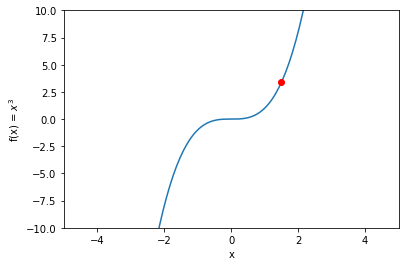

In [11]:
# evaluate the function in a range
fxx = sym.lambdify(x,fx) # a function for evaluating a sympy function
xx = np.linspace(-5,5,200)

# show it in a plot
plt.plot(xx,fxx(xx))

# make the plot look a bit nicer
plt.plot(lim_pnt,lim,'ro')
plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xlabel('x')
plt.ylabel('f(x) = $%s$' %sym.latex(fx))

plt.show()

<IPython.core.display.Math object>

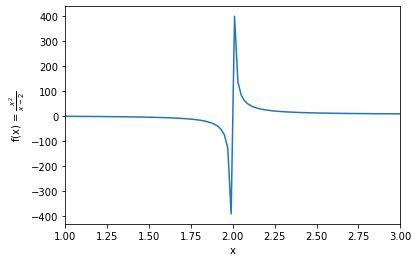

In [12]:
# the function
fx = (x**2)/(x-2)
fxx = sym.lambdify(x,fx) # a function for evaluating a sympy function


xx = np.linspace(1,3,100)

# limit
lim_pnt = 2
lim = sym.limit(fx,x,lim_pnt,dir='+')

display(Math('\\lim_{x\\to %g^+} %s = %g' %(lim_pnt,sym.latex(fx),lim)))

# show it in a plot
plt.plot(xx,fxx(xx))

# make the plot look a bit nicer
plt.plot(lim_pnt,lim,'ro')
plt.xlim([1,3])
plt.xlabel('x')
plt.ylabel('f(x) = $%s$' %sym.latex(fx))

plt.show()

### Exercise

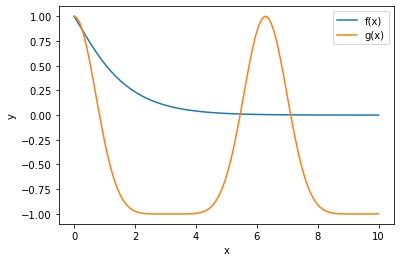

In [14]:
fx = sym.sqrt(x+1)*sym.exp(-x)
gx = sym.cos(x + sym.sin(x))

## start by plotting the functions
fxx = sym.lambdify(x,fx)
gxx = sym.lambdify(x,gx)

xx = np.linspace(0,10,100)

# show it in a plot
plt.plot(xx,fxx(xx),label='f(x)')
plt.plot(xx,gxx(xx),label='g(x)')

# make the plot look a bit nicer
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [16]:
# compute the limits separately at x=5
lim_pnt = 5
lim_fx = sym.limit(fx,x,lim_pnt)
lim_gx = sym.limit(gx,x,lim_pnt)

display(Math('\\frac{\\lim_{x\\to %g} f(x)}{\\lim_{x\\to %g} g(x)} = \\frac{%g}{%g} = %g' \
             %(lim_pnt,lim_pnt,lim_fx,lim_gx,lim_fx/lim_gx)))

# now compute limit of fx/gx
hx = fx/gx
lim_fg = sym.limit(hx,x,lim_pnt)

display(Math('\\lim_{x\\to %g} \\frac{f(x)}{g(x)} = %g' %(lim_pnt,lim_fg)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# VIDEO: Piece-wise functions

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

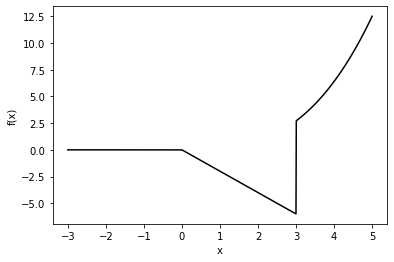

In [2]:
# list function pieces
from sympy.abc import x
piece1 = 0
piece2 = -2*x
piece3 = x**3/10

# put them together with conditions
fx = sym.Piecewise( (piece1,x<0),(piece2,(x>=0) & (x<3)),(piece3,x>=3) )

# evaluate the function in a range
xx = np.linspace(-3,5,1000)
fxx = sym.lambdify(x,fx)

# show it in a plot
plt.plot(xx,fxx(xx),'k')

# make the plot look a bit nicer
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Exercise

<IPython.core.display.Math object>

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in log
  return select([less_equal(x, 0),True], [x**3,log(x)/log(2)], default=nan)
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


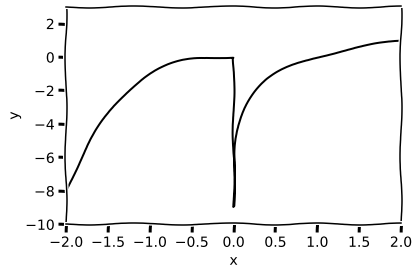

In [3]:
# function pieces
x = sym.symbols('x')

f = x**3
g = sym.log(x,2)

fx = sym.Piecewise( (f,x<=0),(g,x>0) )

# print out the function definition
display(Math('f(x) = ' + sym.latex(fx)))


# evaluate the function in a range
xx = np.linspace(-2,2,1000)
fxx = sym.lambdify(x,fx)

# show it in a plot
with plt.xkcd():
    plt.plot(xx,fxx(xx),'k')

# make the plot look a bit nicer
plt.xlim([-2,2])
plt.ylim([-10,3])
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# VIDEO: Derivatives of polynomials

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Math

In [2]:
x = sym.symbols('x')

fx = x**2

sym.diff(fx)

2*x

In [3]:
# Leibniz notation
display(Math('f(x) = %s, \\quad \\frac{df}{dx} = %s' %(sym.latex(fx),sym.latex(sym.diff(fx)))))

# Lagrange notation
display(Math('f(x) = %s, \\quad f\' = %s' %(sym.latex(fx),sym.latex(sym.diff(fx)))))

# Newton notation
display(Math('f(x) = %s, \\quad \\ddot{f} = %s' %(sym.latex(fx),sym.latex(sym.diff(sym.diff(fx))))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

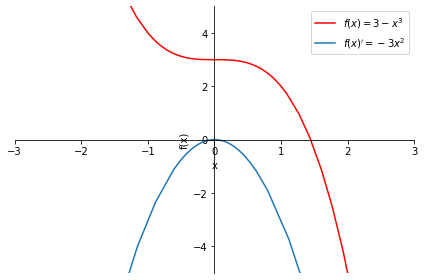

In [4]:
import sympy.plotting.plot as symplot

# plot

fx = (3-x**3)

# generate the first plot
p = symplot(fx,(x,-5,5),show=False)
p[0].label = '$f(x) = %s$' %sym.latex(fx) # create a label for the legend

# extend to show the second plot as well
p.extend( symplot(sym.diff(fx),show=False) )
p[1].label = '$f(x)\' = %s$' %sym.latex(sym.diff(fx))

# some plotting adjustments
p.ylim = [-5,5]
p.xlim = [-3,3]
p[0].line_color = 'r'
p.legend = True # activate the legend

# and show the plot
p.show()


### Exercise

In [5]:
f = 3 + 2*x - 5*x**2 + 7*x**4
g = 4*x**2 + x**5

df = sym.diff(f)
dg = sym.diff(g)

d_f_times_g = sym.diff(f*g)
df_times_dg = sym.diff(f) * sym.diff(g)


display(Math('\\text{Without applying the product rule:}'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_f_times_g))))
display(Math('\\quad f\' \\times g\' = %s' %sym.latex(sym.expand(df_times_dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# apply the product rule
display(Math('\\text{With the product rule: }'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_f_times_g))))
display(Math('\\quad f\'\\times g+f\\times g\' = %s' %sym.latex(sym.expand(df*g+f*dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# try again for addition
dfPlusg  = sym.diff(f+g)

display(Math('(f+ g)\' = %s' %sym.latex(sym.expand(dfPlusg))))
display(Math('f\' + g\' = %s' %sym.latex(sym.expand(df+dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# VIDEO: Derivatives of trig functions

In [8]:
import sympy as sym
from IPython.display import display, Math

In [9]:
q = sym.symbols('q')

print(sym.diff( sym.cos(q) ))
print(sym.diff( sym.sin(q) ))

-sin(q)
cos(q)


In [11]:
# show the cyclicity of sin/cos derivatives
f = sym.cos(q)

for i in range(0,8):
    display(Math('\\frac{d}{dx}%s = %s' %(sym.latex(f),sym.latex(sym.diff(f)))))
    f = sym.diff(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

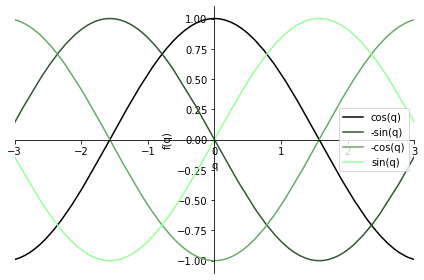

In [15]:
import sympy.plotting.plot as symplot

f = sym.cos(q)

for i in range(0,4):
    if i==0:
        p = symplot(f,show=False,line_color=(i/5,i/3,i/5))
    else:
        p.extend( symplot(f,show=False,line_color=(i/5,i/3,i/5)) )
    f = sym.diff(f)
    
p.legend = True
p.xlim = [-3,3]
p.show()

### Exercise

# VIDEO: Graphing a function tangent line

### Exercise

# VIDEO: Finding critical points of a function

### Exercise

# VIDEO: Partial derivatives

### Exercise

# VIDEO: Indefinite and definite integrals

### Exercise

# VIDEO: Area between two curves

### Exercise

### Computing the area between two functions
The area between two functions is given by the formula $A = \int_{a}^{b}f(x) - g(x) dx$

In our example, $f(x)=x^2$ and $g(x)=x$

Therefore, $A = \int_{a}^{b}(x^2 - x) dx$

We will compute the area between the two crossing points, that is, where the two functions are equal. This is given by the two solutions to the equation
$$x^2=x$$

The two solutions are $x=0$ and $x=1$. This gives us the definite integral of
$$A = \int_{0}^{1}(x^2 - x) dx$$

The final answer will be given in the code below.

# VIDEO: Calculus BUG HUNT!!